In [86]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
from sklearn.preprocessing import LabelEncoder
from matspy import spy
import json


from pipeliner.recommendations.transformer import (
    UserItemMatrixTransformer,
    SimilarityTransformer,
    UserItemMatrixTransformerNP,
    SimilarityTransformerNP,
)
from pipeliner.recommendations.recommender import SimilarityRecommender, SimilarityRecommenderNP


In [88]:
with open("../../tests/test_data/recommendations_toy.json", "r") as f:
    recommendations_toy = json.load(f)

recommendations_toy_probs = np.load("../../tests/test_data/recommendations_toy_probs.npy").astype(np.float32).round(6)

In [89]:
user_item_ratings_df = pd.read_csv(
        "../../tests/test_data/user_item_ratings_toy.csv",
        dtype={"user_id": str, "item_id": str, "rating": np.float32},
        header=0,
    )
print(user_item_ratings_df.shape)
user_item_ratings_df.head(3)

(18, 3)


,user_id,item_id,rating
0,U00001,I00001,1.0
1,U00001,I00002,0.5
2,U00001,I00003,0.5


In [90]:
# encode the user and item ids
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

user_item_ratings_encoded = user_item_ratings_df.copy() 

user_item_ratings_encoded["user_id"] = user_encoder.fit_transform(user_item_ratings_encoded["user_id"])
user_item_ratings_encoded["item_id"] = item_encoder.fit_transform(user_item_ratings_encoded["item_id"])

user_item_ratings_np = user_item_ratings_encoded.to_numpy().astype(np.float32)

unique_users = pd.Series(user_encoder.classes_)
unique_items = pd.Series(item_encoder.classes_)

print(unique_users.shape[0], unique_items.shape[0])
user_item_ratings_encoded.head(3)

6 6


,user_id,item_id,rating
0,0,0,1.0
1,0,1,0.5
2,0,2,0.5


In [91]:
user_item_matrix_toy = pd.read_csv(
        "../../tests/test_data/user_item_matrix_toy.csv",
        header=0,
        index_col=['user_id'],
    ).astype(np.float32)
user_item_matrix_toy

,I00001,I00002,I00003,I00004,I00005,I00006
user_id,,,,,,
U00001,1.0,0.5,0.5,0.0,0.0,0.0
U00002,0.0,1.0,0.5,0.5,0.0,0.0
U00003,0.0,0.0,1.0,0.5,0.5,0.0
U00004,0.0,0.0,0.0,1.0,0.5,0.5
U00005,0.5,0.0,0.0,0.0,1.0,0.5
U00006,0.5,0.5,0.0,0.0,0.0,1.0


In [92]:
item_similarity_matrix_toy = pd.read_csv(
        "../../tests/test_data/item_similarity_matrix_toy.csv",
        header=0,
        index_col=['item_id'],
    ).astype(np.float32)
item_similarity_matrix_toy

,I00001,I00002,I00003,I00004,I00005,I00006
item_id,,,,,,
I00001,1.000000,0.500000,0.333333,0.000000,0.333333,0.500000
I00002,0.500000,1.000000,0.500000,0.333333,0.000000,0.333333
I00003,0.333333,0.500000,1.000000,0.500000,0.333333,0.000000
I00004,0.000000,0.333333,0.500000,1.000000,0.500000,0.333333
I00005,0.333333,0.000000,0.333333,0.500000,1.000000,0.500000
I00006,0.500000,0.333333,0.000000,0.333333,0.500000,1.000000


In [93]:
user_similarity_matrix_toy = pd.read_csv(
        "../../tests/test_data/user_similarity_matrix_toy.csv",
        header=0,
        index_col=['user_id'],
    ).astype(np.float32)
user_similarity_matrix_toy

,U00001,U00002,U00003,U00004,U00005,U00006
user_id,,,,,,
U00001,1.000000,0.500000,0.333333,0.000000,0.333333,0.500000
U00002,0.500000,1.000000,0.500000,0.333333,0.000000,0.333333
U00003,0.333333,0.500000,1.000000,0.500000,0.333333,0.000000
U00004,0.000000,0.333333,0.500000,1.000000,0.500000,0.333333
U00005,0.333333,0.000000,0.333333,0.500000,1.000000,0.500000
U00006,0.500000,0.333333,0.000000,0.333333,0.500000,1.000000


In [94]:
# pandas implementation
user_item_matrix_transformer = UserItemMatrixTransformer()
user_item_matrix = user_item_matrix_transformer.transform(user_item_ratings_df)

assert user_item_matrix.shape == user_item_matrix_toy.shape
assert user_item_matrix.index.equals(user_item_matrix_toy.index)
assert user_item_matrix.columns.equals(user_item_matrix_toy.columns)
np.testing.assert_array_equal(
    user_item_matrix.to_numpy(), 
    user_item_matrix_toy.to_numpy(),
)

In [95]:
# numpy implementation
user_item_matrix_transformer_np = UserItemMatrixTransformerNP()
user_item_matrix_np = user_item_matrix_transformer_np.transform(user_item_ratings_np)

assert user_item_matrix_np.shape == user_item_matrix_toy.shape
np.testing.assert_array_equal(
    user_item_matrix_np.toarray(), 
    user_item_matrix_toy.to_numpy(),
)

In [96]:
# pandas implementation
item_similarity_matrix_transformer =  SimilarityTransformer(kind="item", metric="cosine", normalise=False)
item_similarity_matrix = item_similarity_matrix_transformer.transform(user_item_matrix)

assert item_similarity_matrix.shape == item_similarity_matrix_toy.shape
assert item_similarity_matrix.index.equals(item_similarity_matrix_toy.index)
assert item_similarity_matrix.columns.equals(item_similarity_matrix_toy.columns)
np.testing.assert_array_equal(
    item_similarity_matrix.to_numpy(), 
    item_similarity_matrix_toy.to_numpy()
)

item_similarity_matrix

item_id,I00001,I00002,I00003,I00004,I00005,I00006
item_id,,,,,,
I00001,1.000000,0.500000,0.333333,0.000000,0.333333,0.500000
I00002,0.500000,1.000000,0.500000,0.333333,0.000000,0.333333
I00003,0.333333,0.500000,1.000000,0.500000,0.333333,0.000000
I00004,0.000000,0.333333,0.500000,1.000000,0.500000,0.333333
I00005,0.333333,0.000000,0.333333,0.500000,1.000000,0.500000
I00006,0.500000,0.333333,0.000000,0.333333,0.500000,1.000000


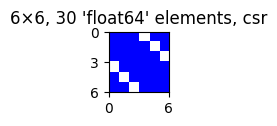

In [97]:
# numpy implementation
item_similarity_matrix_transformer_np =  SimilarityTransformerNP()
item_similarity_matrix_np = item_similarity_matrix_transformer_np.transform(user_item_matrix_np.T)

assert item_similarity_matrix_np.shape == item_similarity_matrix.shape
np.testing.assert_array_equal(
    item_similarity_matrix_np.toarray().astype(np.float32).round(6), 
    item_similarity_matrix.to_numpy().astype(np.float32).round(6)
)

spy(item_similarity_matrix_np)

In [98]:
# pandas implementation
user_similarity_matrix_transformer =  SimilarityTransformer(kind="user", metric="cosine", normalise=False)
user_similarity_matrix = user_similarity_matrix_transformer.transform(user_item_matrix)

assert user_similarity_matrix.shape == user_similarity_matrix_toy.shape
assert user_similarity_matrix.index.equals(user_similarity_matrix_toy.index)
assert user_similarity_matrix.columns.equals(user_similarity_matrix_toy.columns)
np.testing.assert_array_equal(
    user_similarity_matrix.to_numpy().astype(np.float32).round(6), 
    user_similarity_matrix_toy.to_numpy().astype(np.float32).round(6)
)

In [99]:
# numpy implementation
user_similarity_matrix_transformer_np =  SimilarityTransformerNP()
user_similarity_matrix_np = user_similarity_matrix_transformer_np.transform(user_item_matrix_np)

assert user_similarity_matrix_np.shape == user_similarity_matrix.shape
np.testing.assert_array_equal(
    user_similarity_matrix_np.toarray().astype(np.float32).round(6), 
    user_similarity_matrix.to_numpy().astype(np.float32).round(6)
)

In [100]:
item_ids = ['I00001', 'I00002', 'I00003', 'I00004', 'I00005', 'I00006']

rec_pd = SimilarityRecommender(10)
rec_pd.fit(item_similarity_matrix)
item_recs_pd = rec_pd.predict(item_ids)

for item_id, result in zip(item_ids, item_recs_pd):
    np.testing.assert_array_equal(recommendations_toy[item_id], result)

item_probs_pd = rec_pd.predict_proba(item_ids)
np.testing.assert_array_equal(item_probs_pd, recommendations_toy_probs)

item_recs_pd, item_probs_pd

(array([['I00002', 'I00006', 'I00003', 'I00005'],
        ['I00001', 'I00003', 'I00004', 'I00006'],
        ['I00002', 'I00004', 'I00001', 'I00005'],
        ['I00003', 'I00005', 'I00002', 'I00006'],
        ['I00004', 'I00006', 'I00001', 'I00003'],
        ['I00001', 'I00005', 'I00002', 'I00004']], dtype=object),
 array([[1.      , 0.5     , 0.333333, 0.      , 0.333333, 0.5     ],
        [0.5     , 1.      , 0.5     , 0.333333, 0.      , 0.333333],
        [0.333333, 0.5     , 1.      , 0.5     , 0.333333, 0.      ],
        [0.      , 0.333333, 0.5     , 1.      , 0.5     , 0.333333],
        [0.333333, 0.      , 0.333333, 0.5     , 1.      , 0.5     ],
        [0.5     , 0.333333, 0.      , 0.333333, 0.5     , 1.      ]],
       dtype=float32))

In [101]:
item_ids_encoded = item_encoder.transform(item_ids)

item_similarity_matrix_np_dense = item_similarity_matrix_np.toarray()


rec_np = SimilarityRecommenderNP(10)
rec_np.fit(user_similarity_matrix_np)
item_recs_np = rec_np.predict(item_ids_encoded)

results = [item_encoder.inverse_transform(item).tolist() for item in item_recs_np]


for item_id, item_id_encoded, result in zip(item_ids, item_ids_encoded, results):
    np.testing.assert_array_equal(recommendations_toy[item_id], result)

item_probs_np = rec_np.predict_proba(item_ids_encoded).toarray().astype(np.float32).round(6)
np.testing.assert_array_equal(item_probs_np, recommendations_toy_probs)

results, item_probs_np

([['I00002', 'I00006', 'I00003', 'I00005'],
  ['I00001', 'I00003', 'I00004', 'I00006'],
  ['I00002', 'I00004', 'I00001', 'I00005'],
  ['I00003', 'I00005', 'I00002', 'I00006'],
  ['I00004', 'I00006', 'I00001', 'I00003'],
  ['I00001', 'I00005', 'I00002', 'I00004']],
 array([[1.      , 0.5     , 0.333333, 0.      , 0.333333, 0.5     ],
        [0.5     , 1.      , 0.5     , 0.333333, 0.      , 0.333333],
        [0.333333, 0.5     , 1.      , 0.5     , 0.333333, 0.      ],
        [0.      , 0.333333, 0.5     , 1.      , 0.5     , 0.333333],
        [0.333333, 0.      , 0.333333, 0.5     , 1.      , 0.5     ],
        [0.5     , 0.333333, 0.      , 0.333333, 0.5     , 1.      ]],
       dtype=float32))